In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep
from pathlib import Path

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'ROC_curves.ipynb', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'HiggsDiscriminators.ipynb', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [2]:
pt_axis = hist.axis.Regular(50, 200, 1000, name="pt", label="Jet $p_T$ [GeV]")
trig_axis = hist.axis.Regular(100, 0, 1, name="trigger", label="Trigger")
msd_axis = hist.axis.Regular(20, 40, 200, name="msd", label="mSD [GeV]")                # Soft Drop Mass
xbb_axis = hist.axis.Regular(80, 0, 1, name="xjj", label="Xbb")                         # Discriminator

sample_axis = hist.axis.StrCategory([], name="name", growth=True)                       #samples
proc_axis = hist.axis.StrCategory([], name="process", growth=True)                      #processes: Zto2Q, QCD, TT, Diboson
order_axis = hist.axis.StrCategory([], name="order", growth=True)                       #order: NLO, LO
mreg_axis = hist.axis.Regular(20, 40, 200, name="mreg", label="M_reg [GeV]")                      #Mreg
mleg_axis = hist.axis.Regular(20, 40, 200, name="mleg", label="M_leg [GeV]")                      #Mleg

tz_axis = hist.axis.Regular(80, 0, 1, name="TZ", label="T_Z")                      #T_Z
tw_axis = hist.axis.Regular(80, 0, 1, name="TW", label="T_W")                      #T_W
tv_axis = hist.axis.Regular(80, 0, 1, name="TV", label="T_V")                      #T_V
tcs_axis = hist.axis.Regular(80, 0, 1, name="Tcs", label="Tcs")                      #T_CS


In [22]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": [
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    
    
    "Wto2Q":[
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
        ],
        
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },

    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },

    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    },

    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },

}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    #("GenVPt", 1),
    ("ak8FatJetmsoftdrop", 1),
    ("ak8FatJetPNetMass", 1),
    ("ak8FatJetMass_legacy", 2),
    ("ak8FatJetParTmassRes", 1),
    ("ak8FatJetParTmassVis", 1),
    #("ak8FatJetPNetTXbb", 2),
    #("ak8FatJetPNetTXjj", 2),
    #("ak8FatJetPNetTXcc", 2),
    #("ak8FatJetPNetQCD", 2),
    #("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 1),
    ('ak8FatJetParTPQCD2HF', 1),
    ('ak8FatJetParTPQCD0HF', 1),
    ('ak8FatJetParTPXbb', 1),
    ('ak8FatJetParTPXcc', 1),
    ('ak8FatJetParTPXcs', 1),
    ('ak8FatJetParTPXgg', 1),
    ('ak8FatJetParTPXqq', 1),
    ("AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35", 1), # for 2022 and a small fraction of 2023
    ("AK8PFJet230_SoftDropMass40_PNetBB0p06", 1), #new for 2023
    ("AK8PFJet400_SoftDropMass40", 1),
    ("AK8PFJet425_SoftDropMass40", 1),
]

load_columns_V = load_columns + [
    ("GenVPt", 1),
    ("GenVis_bb", 1),
    ("GenVis_cc", 1),
    ("GenVis_cs", 1),
]
    


# Fill all masses

In [23]:
# Initialize histograms once (these stay in memory)

h_mass = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)
h_mass_bb = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)
h_mass_cc = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)
h_mass_cs = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)
h_mass_rest = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)  

h_Tx = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis) #  tcs_axis, xbb_axis,
h_Tx_bb = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis)
h_Tx_cc = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis)
h_Tx_cs = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis)
h_Tx_rest = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis)



In [24]:
# Define a function to handle the histogram filling logic
def fill_mass(events, zto, sample):
    for key, data in events.items():
        weight = data["finalWeight"]
        msd = data["ak8FatJetmsoftdrop"][0]
        mvis = data["ak8FatJetParTmassVis"][0]
        mres = data["ak8FatJetParTmassRes"][0]
        reg = data["ak8FatJetPNetMass"][0]
        leg = data["ak8FatJetMass_legacy"][0]

        Pxqq = data["ak8FatJetParTPXqq"][0]
        Pxbb = data["ak8FatJetParTPXbb"][0]
        Pxcc = data["ak8FatJetParTPXcc"][0]
        Pxgg = data["ak8FatJetParTPXgg"][0]
        Pxcs = data["ak8FatJetParTPXcs"][0]
        PQCD = (
            data["ak8FatJetParTPQCD1HF"][0]
            + data["ak8FatJetParTPQCD2HF"][0]
            + data["ak8FatJetParTPQCD0HF"][0]
        )

        # Compute discriminators
        Txqq = (Pxqq + Pxcc) / (Pxqq + Pxcc + PQCD)
        Txbb = Pxbb / (Pxbb + PQCD)
        Txcc = Pxcc / (Pxcc + PQCD)
        Txgg = Pxgg / (Pxgg + PQCD)
        Txcs = Pxcs / (Pxcs + PQCD)
        #TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD + Pxgg + Pxbb + Pxcc)
        #TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD + Pxgg + Pxcs)
        TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD)
        TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD)
        TV = (Pxbb + Pxcc + Pxqq + Pxcs) / (Pxbb + Pxcc + Pxqq + Pxcs + PQCD)

        HLTs = ( data["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] |
            data["AK8PFJet230_SoftDropMass40_PNetBB0p06"][0] |  
            data["AK8PFJet400_SoftDropMass40"][0] | 
            data["AK8PFJet425_SoftDropMass40"][0] 
        )


        selection = (msd > 40) & (HLTs) #& (Txcs>0.95)  #& (TZ > 0.95)

        # Fill histograms
        h_mass.fill(msd[selection], reg[selection], leg[selection], zto, sample, weight=weight[selection])
        #h_mass.fill(mvis[selection], mres[selection], msd[selection], zto, sample, weight=weight[selection])
        #h_Tx.fill(TZ[selection], TW[selection], TV[selection], zto, sample, weight=weight[selection])

        # ... (fill other histograms similarly)

        if zto in {"Zto2Q", "Wto2Q"}:
            pt = data["GenVPt"][0]
            bb = data["GenVis_bb"][0]  # Handle missing keys gracefully
            cc = data["GenVis_cc"][0]
            cs = data["GenVis_cs"][0]
            # cs = data.get("GenVis_cs") #, np.zeros_like(msd))
            selection = selection & (pt>300)

            # to BB
            h_mass_bb.fill(msd[bb&selection], reg[bb&selection], leg[bb&selection], zto, sample, weight=weight[bb&selection])
            #h_mass_bb.fill(mvis[bb&selection], mres[bb&selection], msd[bb&selection], zto, sample, weight=weight[bb&selection])
            #h_Tx_bb.fill(TZ[bb&selection], TW[bb&selection], TV[bb&selection], zto, sample, weight=weight[bb&selection])
            

            # to CC
            h_mass_cc.fill(msd[cc&selection], reg[cc&selection], leg[cc&selection] ,zto, sample, weight=weight[cc&selection])
            #h_mass_cc.fill(mvis[cc&selection], mres[cc&selection], msd[cc&selection], zto, sample, weight=weight[cc&selection])
            #h_Tx_cc.fill(TZ[cc&selection], TW[cc&selection], TV[cc&selection], zto, sample, weight=weight[cc&selection])

            # to CS
            h_mass_cs.fill(msd[cs&selection], reg[cs&selection], leg[cs&selection], zto, sample, weight=weight[cs&selection])
            #h_mass_cs.fill(mvis[cs&selection], mres[cs&selection], msd[cs&selection], zto, sample, weight=weight[cs&selection])
            #h_Tx_cs.fill(TZ[cs&selection], TW[cs&selection], TV[cs&selection], zto, sample, weight=weight[cs&selection])

            # Everything else
            h_mass_rest.fill(msd[(~(bb | cc | cs))&selection], reg[(~(bb | cc | cs))&selection], leg[(~(bb | cc | cs))&selection], zto, sample, weight=weight[(~(bb | cc | cs))&selection])
            #h_mass_rest.fill(mvis[(~(bb | cc | cs))&selection], mres[(~(bb | cc | cs))&selection], msd[(~(bb | cc | cs))&selection], zto, sample, weight=weight[(~(bb | cc | cs))&selection])
            #h_Tx_rest.fill(TZ[(~(bb | cc | cs))&selection], TW[(~(bb | cc | cs))&selection], TV[(~(bb | cc | cs))&selection], zto, sample, weight=weight[(~(bb | cc | cs))&selection])

            del bb, cc, cs, pt

        # Clear intermediate arrays to save memory
        del weight, msd, Pxqq, Pxbb, Pxcc, Pxgg, PQCD, reg, leg, Txqq, Txbb, Txcc, Txgg, Txcs, TW, TZ, TV, selection, HLTs

In [51]:
from pathlib import Path
from hpt import utils  # Assuming your utility functions are here



# Loop through Zto2Q, Wto2Q, QCD... processes
for zto, sample_list in samples.items():
    for input_dir, dirs_samples in dirs.items():
        # Loop through each sample individually to avoid loading everything at once
        for sample in sample_list:
            try:
                # Load only one sample at a time
                events = utils.load_samples(
                    input_dir,
                    zto,
                    [sample],  # List containing a single sample
                    year,
                    columns=utils.format_columns(
                        load_columns_V if zto in {"Zto2Q", "Wto2Q"} else load_columns
                    ),
                )

                # Fill histograms with the loaded sample
                fill_mass(events, zto, sample)  # See function definition below
                #fill_discriminator(events, zto, sample)  # See function definition

            except KeyError as e:
                print(f"Warning: Missing key {e} in sample {sample}. Skipping.")

            # Ensure the sample is deleted from memory after use
            del events


sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2101989 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_2J
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 4993634 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_1J
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 1136172 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_2J
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1659970 entries
sample_name Zto2Q-2Jets_PTQQ-600_1J
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample WWto4Q.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded TTtoLNu2Q                                         : 2846206 entries
sample_name TTto2L2Nu
Loading TTto2L2Nu
Loaded TTto2L2Nu                                         : 257866 entries
sample_name TTto4Q
Loading TTto4Q
Loaded TTto4Q                                            : 4593316 entries
sample_name QCD_HT-1000to1200
Loading QCD_HT-1000to1200
Loaded QCD_HT-1000to1200                                 : 28209931 entries
sample_name QCD_HT-40to70
sample_name QCD_HT-1500to2000
Loading QCD_HT-1500to2000


/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-40to70.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded QCD_HT-1500to2000                                 : 38199880 entries
sample_name QCD_HT-1200to1500
Loading QCD_HT-1200to1500
Loaded QCD_HT-1200to1500                                 : 39452675 entries
sample_name QCD_HT-200to400
Loading QCD_HT-200to400
Loaded QCD_HT-200to400                                   : 565 entries
sample_name QCD_HT-400to600
Loading QCD_HT-400to600
Loaded QCD_HT-400to600                                   : 511444 entries
sample_name QCD_HT-800to1000
Loading QCD_HT-800to1000
Loaded QCD_HT-800to1000                                  : 32410010 entries
sample_name QCD_HT-600to800
Loading QCD_HT-600to800
Loaded QCD_HT-600to800                                   : 15614262 entries
sample_name QCD_HT-70to100
sample_name QCD_HT-100to200
Loading QCD_HT-100to200
Loaded QCD_HT-100to200                                   : 258 entries
sample_name JetMET_Run2023Cv4
Loading JetMET_Run2023Cv4


/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-70to100.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded JetMET_Run2023Cv4                                 : 48193189 entries
sample_name JetMET_Run2023Cv2
Loading JetMET_Run2023Cv2
Loaded JetMET_Run2023Cv2                                 : 6896267 entries
sample_name JetMET_Run2023Cv3
Loading JetMET_Run2023Cv3
Loaded JetMET_Run2023Cv3                                 : 7513248 entries
sample_name JetMET_Run2023Cv1
Loading JetMET_Run2023Cv1
Loaded JetMET_Run2023Cv1                                 : 23051745 entries
sample_name GluGluHto2B_M-125
Loading GluGluHto2B_M-125
Loaded GluGluHto2B_M-125                                 : 44176 entries
sample_name WminusH_Hto2B_Wto2Q_M-125
Loading WminusH_Hto2B_Wto2Q_M-125
Loaded WminusH_Hto2B_Wto2Q_M-125                         : 214570 entries
sample_name WplusH_Hto2B_WtoLNu_M-125
Loading WplusH_Hto2B_WtoLNu_M-125
Loaded WplusH_Hto2B_WtoLNu_M-125                         : 75637 entries
sample_name WplusH_Hto2B_Wto2Q_M-125
Loading WplusH_Hto2B_Wto2Q_M-125
Loaded WplusH_Hto2B_Wto2Q_M-125         

In [30]:
h_mass.axes

(Regular(10, 40, 110, name='msd', label='mSD [GeV]'),
 Regular(10, 40, 110, name='mreg', label='M_reg [GeV]'),
 Regular(10, 40, 110, name='mleg', label='M_leg [GeV]'),
 StrCategory(['Zto2Q', 'Wto2Q', 'Diboson', 'TT', 'QCD', 'data', 'ggH', 'WH', 'ZH', 'ttH'], growth=True, name='process'),
 StrCategory(['Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-600_2J', 'WZ', 'WW', 'ZZ', 'TTto4Q', 'TTto2L2Nu', 'TTtoLNu2Q', 'QCD_HT-400to600', 'QCD_HT-600to800', 'QCD_HT-800to1000', 'QCD_HT-1000to1200', 'QCD_HT-1200to1500', 'QCD_HT-1500to2000', 'JetMET_Run2023Cv3', 'JetMET_Run2023Cv2', 'JetMET_Run2023Cv4',

In [42]:
h_mass[{"process": "TT", "name":sum}].project("mreg")

Hist(Regular(80, 40, 110, name='mreg', label='M_reg [GeV]'), storage=Double()) # Sum: 26218.74785247165 (103242.59634556883 with flow)

In [52]:
# Histos dictionary

hists = {}
lumi = 17650/1000
energy = "13.6 TeV"
for mass in ["msd", "mreg", "mleg"]:
    hists[mass] = {}
    for process, sample_list in samples.items():
        # = "Zto2Q" or "Zto2Nu"
        #hists[mass][process] = h_mass[{"process":process, "name":sum}]

        hists[mass][process] = h_mass[{"process": process, "name":sum}].project(mass)
        #legend[process] = process
            




ValueError: The axis name mreg could not be found

In [46]:
hists["msd"]["QCD"]

Hist(Regular(10, 40, 110, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 5.652294550855611 (39.94272648667851 with flow)

In [11]:
hists["msd"]["QCD"].sum()

45958.097452670896

In [41]:
bg_keys = ["Zto2Q", "Wto2Q", "QCD", "Diboson", "TT"]
kfactor = {}
for mass in ["msd", "mreg", "mleg"]:
    kfactor[mass] = {}
    kfactor[mass] = {sample: 1 for sample in bg_keys}

    # Sum all background histograms using proper histogram summation
    bg_yield = sum([hists[mass][sample].sum() for sample in bg_keys])
    qcd_yield = hists[mass]["QCD"].sum()

    # Assuming there's a specific histogram for the data yield
    data_yield = hists[mass]["data"].sum()
    if bg_yield > 0:
        kfactor[mass]["QCD"] = (data_yield - bg_yield + qcd_yield)/ qcd_yield
        #kfactor["QCD"] = data_yield / bg_yield

In [35]:
from hist.intervals import ratio_uncertainty

def plot_stack(mass, cut):

    h_z = hists[mass]["Zto2Q"]
    h_w = hists[mass]["Wto2Q"]
    h_qcd = hists[mass]["QCD"]
    h_diboson = hists[mass]["Diboson"]
    h_tt = hists[mass]["TT"]
    h_ggh = hists[mass]["ggH"]
    h_wh = hists[mass]["WH"]
    h_zh = hists[mass]["ZH"]
    h_tth = hists[mass]["ttH"]
    scale = kfactor[mass]["QCD"]

    h_z_bb = h_mass_bb[{"process":"Zto2Q", "name": sum}].project(mass)
    h_z_cc = h_mass_cc[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_cs = h_mass_cs[{"process":"Wto2Q", "name": sum}].project(mass)
    h_z_rest = h_mass_rest[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_rest = h_mass_rest[{"process":"Wto2Q", "name": sum}].project(mass)

    h_data = hists[mass]["data"]

    #labels = ["z", "w"]

    # Apply kfactor to each histogram
    #h_scaled = [hists[sample] * kfactor[sample] for sample in ["Zto2Q", "Wto2Q", "QCD", "Diboson", "TT"]]   # no quark content
    #h_scaled = [h_z, h_w, h_qcd*scale, h_diboson, h_tt]  ## no quark content
    #legends = ["Z", "W", r"QCD $\times$"+ f"{scale:.2f}", "Diboson", "TT"]  ## no quark content
    #colors = ['blue', 'green', 'red', 'purple', 'orange']  # no quark content

    h_scaled = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest, h_diboson, h_tt, h_ggh, h_wh, h_zh, h_tth, h_qcd*scale]
    #h_scaled = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest, h_diboson, h_tt, h_qcd*scale]
    #legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light", "Diboson", "TT", r"QCD $\times$"+ f"{scale:.2f}"]
    legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light", "Diboson", "TT", "ggH", "WH", "ZH", "ttH", r"QCD $\times$"+ f"{scale:.2f}"]
    #colors = ['gray', 'blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan']  
    colors = ['gray', 'blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'teal', 'brown', 'pink', 'mediumslateblue']  

    # Calculate yields for each histogram
    yields = {
        "Z -> bb": h_z_bb.values().sum(),
        "Z -> cc": h_z_cc.values().sum(),
        "W -> cs": h_w_cs.values().sum(),
        "Z -> light": h_z_rest.values().sum(),
        "W -> light": h_w_rest.values().sum(),
        "Diboson": h_diboson.values().sum(),
        "TT": h_tt.values().sum(),
        "ggH": h_ggh.values().sum(),
        "WH": h_wh.values().sum(),
        "ZH": h_zh.values().sum(),
        "ttH": h_tth.values().sum(),
    }

    # Create a list of histograms, legends, and colors
    histograms = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest, h_diboson, h_tt, h_ggh, h_wh, h_zh, h_tth]
    legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light", "Diboson", "TT", "ggH", "WH", "ZH", "ttH"]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'teal', 'brown', 'pink', 'mediumslateblue']

    # Sort histograms by yield while keeping track of indices
    sorted_indices = sorted(range(len(histograms)), key=lambda i: yields[legends[i]], reverse=False)

    # Create sorted lists based on the sorted indices
    sorted_histograms = [histograms[i] for i in sorted_indices]
    sorted_legends = [legends[i] for i in sorted_indices]
    sorted_colors = [colors[i] for i in sorted_indices]

    h = [h_qcd*scale] + sorted_histograms
    colors = ['gray'] + sorted_colors
    legends = [r"QCD $\times$"+ f"{scale:.2f}"] + sorted_legends

    fig, (ax, rax) = plt.subplots(
                2,
                1,
                figsize=(12, 12),
                gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
                sharex=True,
            )
    # 1st panel
    ax.set_ylabel("Events")

    #ax.set_yscale("log")
    # plot MC
    hep.histplot(h, ax=ax, stack=True, label=legends, color=colors,density=False, histtype="fill", edgecolor="black", linewidth=1)

    # plot Data
    hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data")
    ax.legend()
    #ax.set_yscale("log")
    #ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
    ax.legend(title=f"{cut}")
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")
    ax.set_xlim(40, 200)
    if mass == "msd":
        ax.set_xlabel("mSD [GeV]")
    if mass == "mreg":
        ax.set_xlabel("m_reg [GeV]")
    if mass == "mleg":
        ax.set_xlabel("m_legacy [GeV]")

    hep.cms.label(
                "Work in Progress",
                fontsize=24,
                data=True,
                lumi="17.65",
                year="2023",
                ax=ax,
                com="13.6",
            )

    # 2nd panel
    bg_total = sum(h_scaled) ## , h_qcd, h_diboson, h_tt
    tot_val = bg_total.values()
    tot_val_zero_mask = tot_val == 0
    tot_val[tot_val_zero_mask] = 1
    data_val = h_data.values()
    data_val[tot_val_zero_mask] = 1
    yerr = ratio_uncertainty(data_val, tot_val, "poisson")
    yvalue = data_val / tot_val

    hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar", color="black")
    rax.set_ylabel("Data/MC")
    rax.set_ylim(0, 2)
    if mass == "msd":
        rax.set_xlabel("m_vis [GeV]")
    if mass == "mreg":
        rax.set_xlabel("m_res [GeV]")
    if mass == "mleg":
        rax.set_xlabel("m_legacy [GeV]")
    rax.set_xlim(40, 200)
    rax.grid(axis="y")
    rax.axhline(1, color="black", linestyle="--")
    plt.show()

In [10]:
from hist.intervals import ratio_uncertainty

def plot_density(mass, cut):

    h_z = hists[mass]["Zto2Q"]
    h_w = hists[mass]["Wto2Q"]
    h_qcd = hists[mass]["QCD"]
    h_diboson = hists[mass]["Diboson"]
    h_tt = hists[mass]["TT"]
    scale = kfactor[mass]["QCD"]

    h_z_bb = h_mass_bb[{"process":"Zto2Q", "name": sum}].project(mass)
    h_z_cc = h_mass_cc[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_cs = h_mass_cs[{"process":"Wto2Q", "name": sum}].project(mass)
    h_z_rest = h_mass_rest[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_rest = h_mass_rest[{"process":"Wto2Q", "name": sum}].project(mass)

    h_data = hists[mass]["data"]
    h = [h_z, h_w, h_qcd, h_diboson, h_tt]
    #labels = ["z", "w"]

    # Apply kfactor to each histogram
    #h_scaled = [hists[sample] * kfactor[sample] for sample in ["Zto2Q", "Wto2Q", "QCD", "Diboson", "TT"]]   # no quark content
    #h_scaled = [h_z, h_w, h_qcd*scale, h_diboson, h_tt]  ## no quark content
    #legends = ["Z", "W", r"QCD $\times$"+ f"{scale:.2f}", "Diboson", "TT"]  ## no quark content
    #colors = ['blue', 'green', 'red', 'purple', 'orange']  # no quark content

    h_scaled = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest, h_diboson, h_tt, h_qcd*scale]
    legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light", "Diboson", "TT", r"QCD $\times$"+ f"{scale:.2f}"]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'gray']


    fig, ax = plt.subplots(
                1,
                1,
                figsize=(12, 12),
                #gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
                #sharex=True,
            )
    # 1st panel
    ax.set_ylabel("Events")

    #ax.set_yscale("log")
    # plot MC
    hep.histplot(h_scaled, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True, linewidth=2) 


    # plot Data
    #hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data")
    ax.legend()
    #ax.set_yscale("log")
    #ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
    ax.legend(title=f"pT>300 GeV, {cut}")
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")
    ax.set_xlim(40, 110)
    if mass == "msd":
        ax.set_xlabel("m_vis [GeV]")
    if mass == "mreg":
        ax.set_xlabel("m_res [GeV]")
    if mass == "mleg":
        ax.set_xlabel("m_legacy [GeV]")


    plt.show()

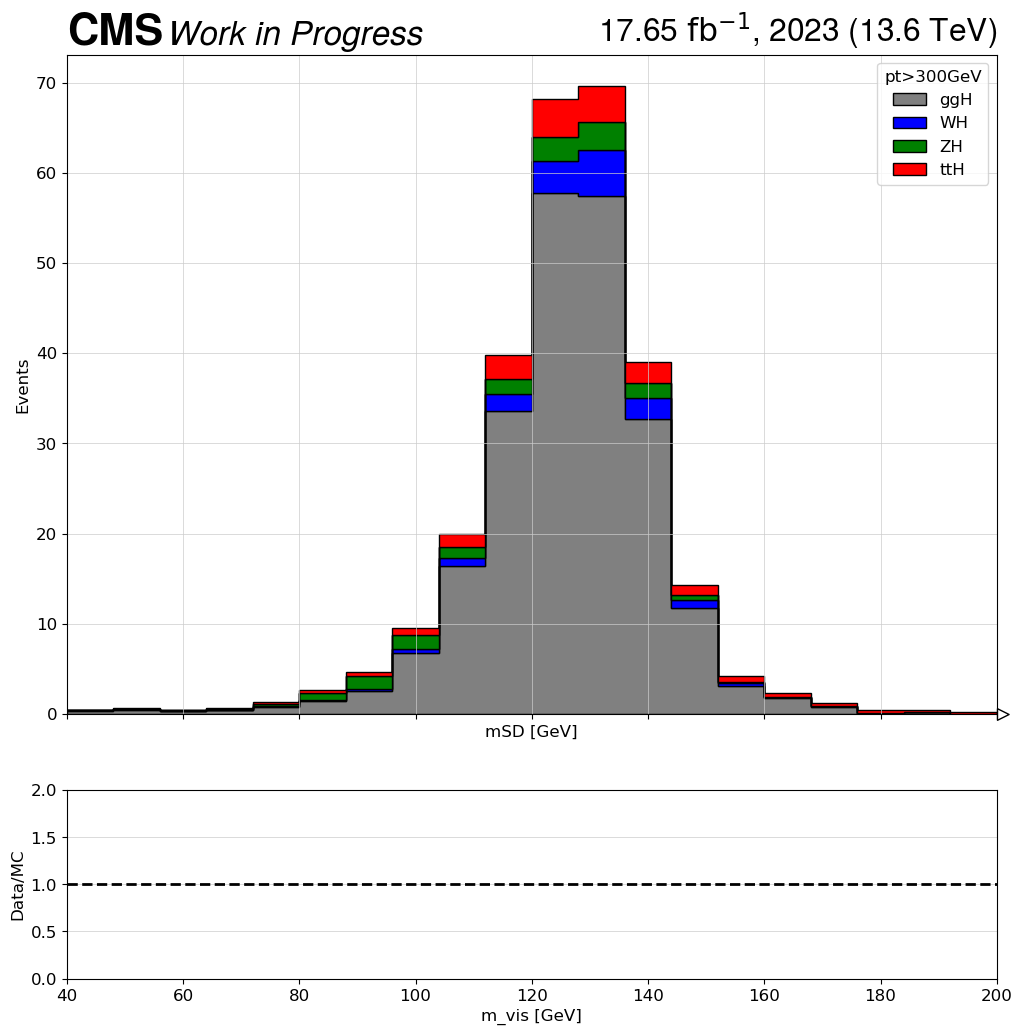

In [62]:
plot_stack("msd", "pt>300GeV")
#plot_stack("mreg", "pt>300GeV")
#plot_stack("mleg", "PNet HLT, Txbb>0.95, TW<0.3, pt>300GeV")

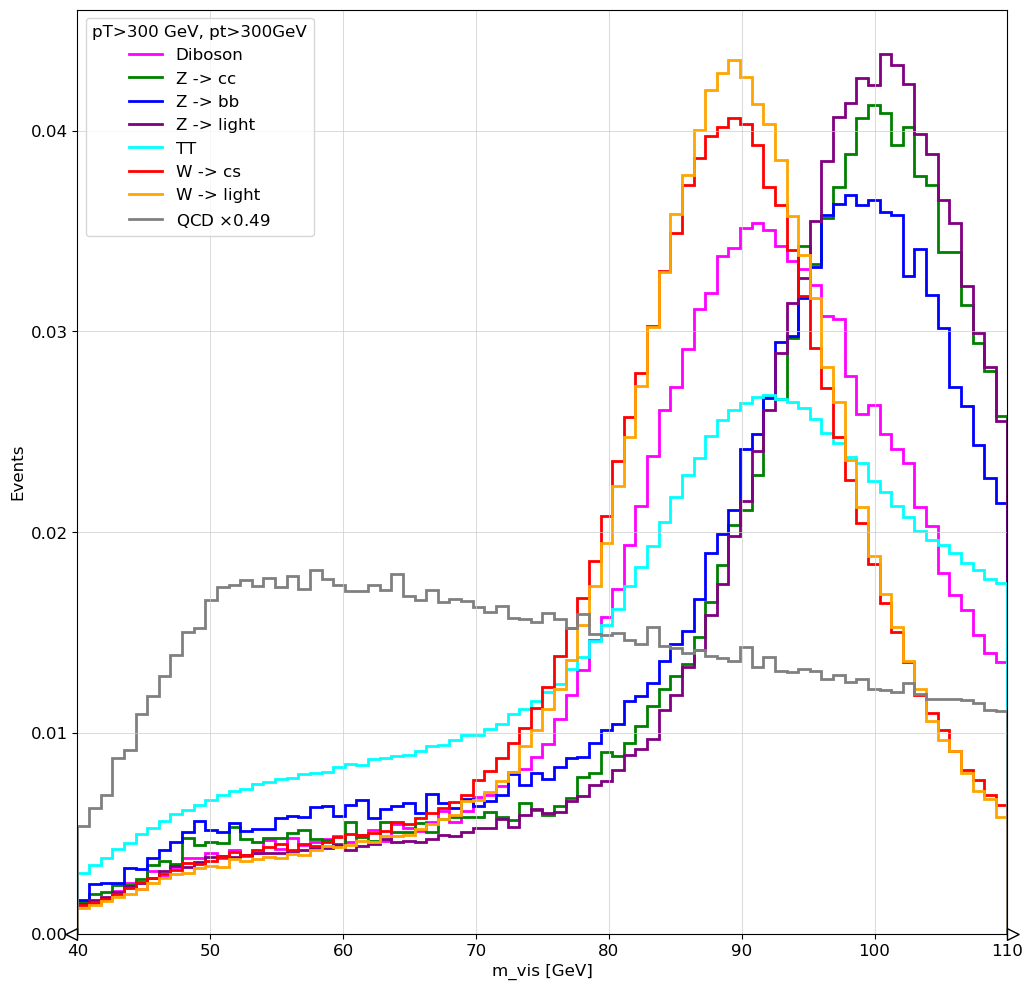

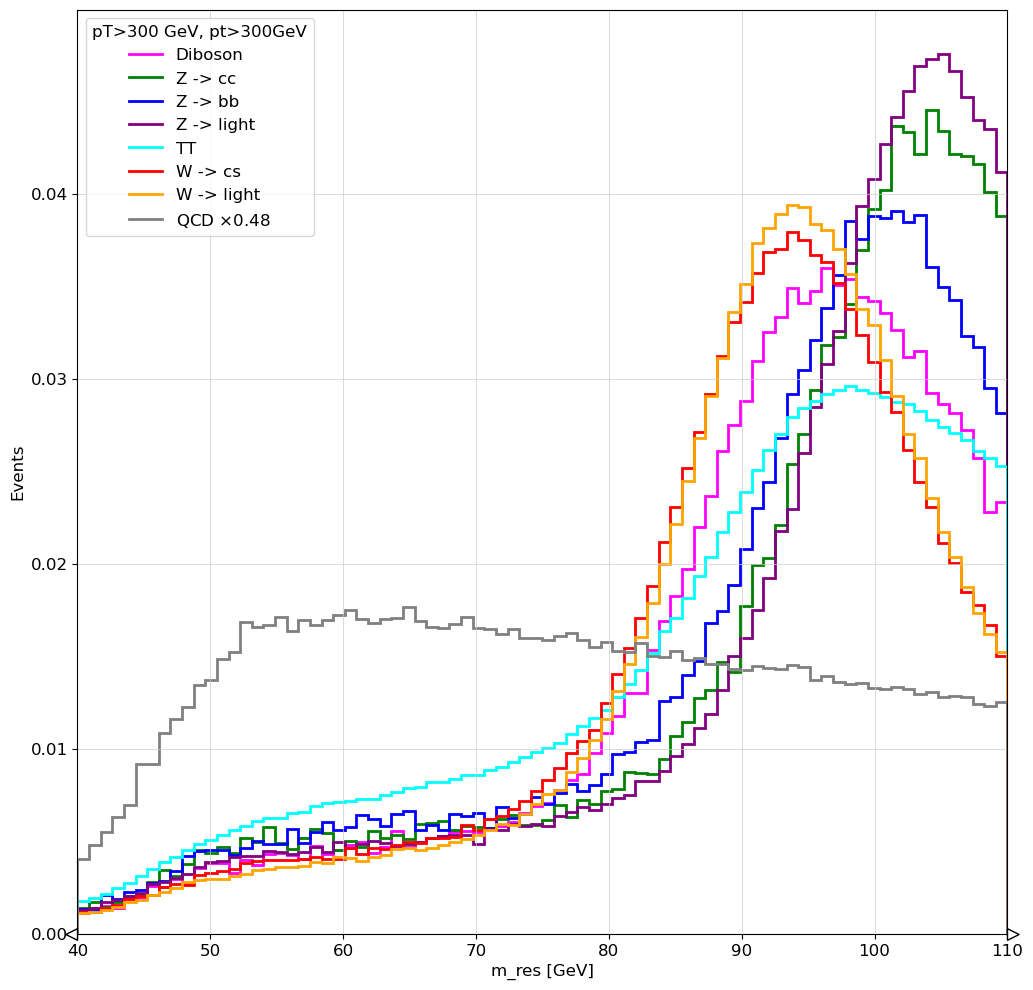

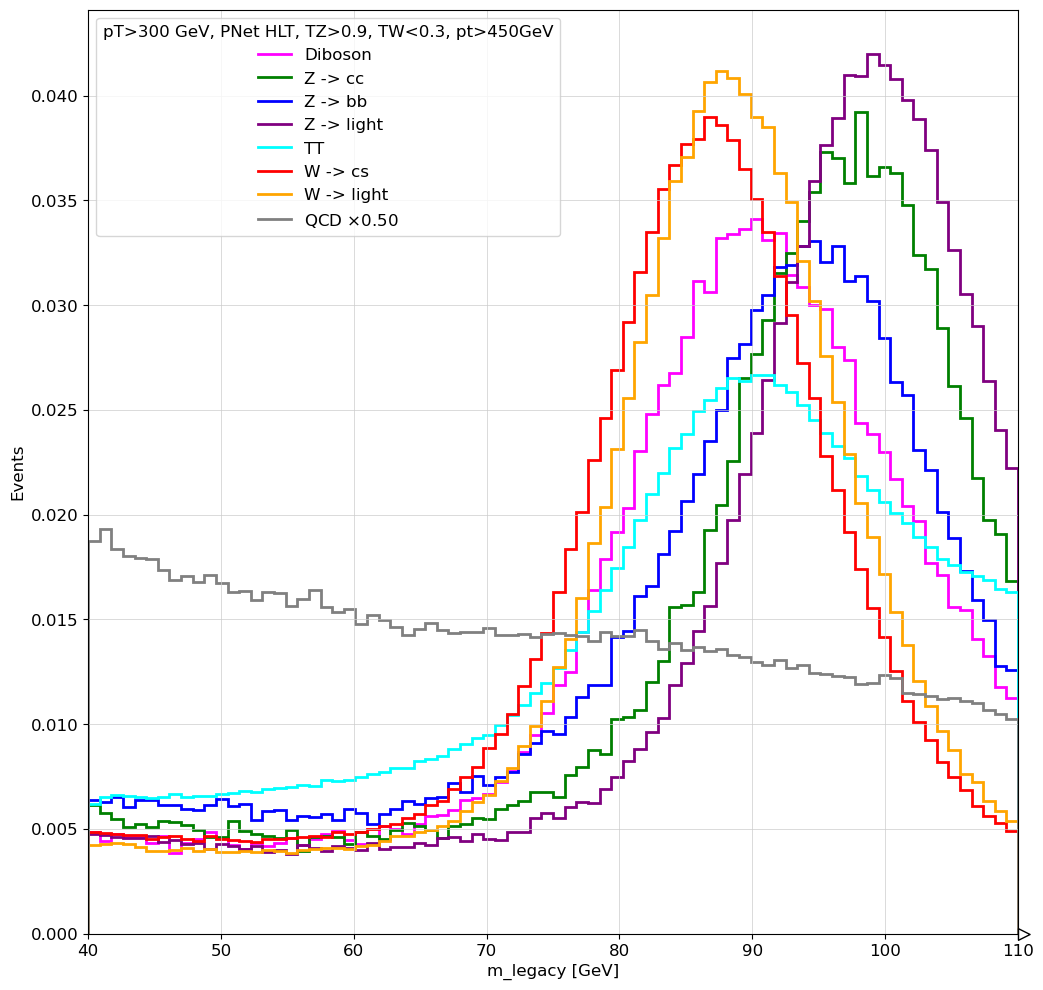

In [11]:
plot_density("msd", "pt>300GeV")
plot_density("mreg", "pt>300GeV")
plot_density("mleg", "PNet HLT, TZ>0.9, TW<0.3, pt>450GeV")

In [14]:
# Define a function to handle the histogram filling logic
def fill_discriminator(events, zto, sample):
    for key, data in events.items():
        weight = data["finalWeight"]
        msd = data["ak8FatJetmsoftdrop"][0]
        reg = data["ak8FatJetPNetMass"][0]
        leg = data["ak8FatJetMass_legacy"][0]

        Pxqq = data["ak8FatJetParTPXqq"][0]
        Pxbb = data["ak8FatJetParTPXbb"][0]
        Pxcc = data["ak8FatJetParTPXcc"][0]
        Pxgg = data["ak8FatJetParTPXgg"][0]
        Pxcs = data["ak8FatJetParTPXcs"][0]
        PQCD = (
            data["ak8FatJetParTPQCD1HF"][0]
            + data["ak8FatJetParTPQCD2HF"][0]
            + data["ak8FatJetParTPQCD0HF"][0]
        )

        # Compute discriminators
        Txqq = (Pxqq + Pxcc) / (Pxqq + Pxcc + PQCD)
        Txbb = Pxbb / (Pxbb + PQCD)
        Txcc = Pxcc / (Pxcc + PQCD)
        Txgg = Pxgg / (Pxgg + PQCD)
        Txcs = Pxcs / (Pxcs + PQCD)
        #TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD + Pxgg + Pxbb + Pxcc)
        #TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD + Pxgg + Pxcs)
        TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD)
        TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD)
        TV = (Pxbb + Pxcc + Pxqq + Pxcs) / (Pxbb + Pxcc + Pxqq + Pxcs + PQCD)

        HLTs = ( data["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] |
            data["AK8PFJet230_SoftDropMass40_PNetBB0p06"][0] #|  
            #data["AK8PFJet400_SoftDropMass40"][0] | 
            #data["AK8PFJet425_SoftDropMass40"][0] 
        )


        selection = (msd > 40) & HLTs #& (TV>0.9)#& (Txbb > 0.8)

        # Fill histograms
        h_Tx.fill(TZ[selection], TW[selection], TV[selection], zto, sample, weight=weight[selection]) #Txcs[selection], Txbb[selection], 
        # ... (fill other histograms similarly)

        if zto in {"Zto2Q", "Wto2Q"}:
            pt = data["GenVPt"][0]
            bb = data["GenVis_bb"][0]  # Handle missing keys gracefully
            cc = data["GenVis_cc"][0]
            cs = data["GenVis_cs"][0]
            # cs = data.get("GenVis_cs") #, np.zeros_like(msd))

            selection = selection & (pt>300)

            # to BB
            h_Tx_bb.fill(TZ[bb&selection], TW[bb&selection], TV[bb&selection], zto, sample, weight=weight[bb&selection])  # Txcs[bb&selection], Txbb[bb&selection],
            

            # to CC
            h_Tx_cc.fill(TZ[cc&selection], TW[cc&selection], TV[cc&selection], zto, sample, weight=weight[cc&selection]) # Txcs[cc&selection], Txbb[cc&selection],

            # to CS
            h_Tx_cs.fill(TZ[cs&selection], TW[cs&selection], TV[cs&selection], zto, sample, weight=weight[cs&selection]) #  Txcs[cs&selection], Txbb[cs&selection],

            # Everything else
            h_Tx_rest.fill(TZ[(~(bb | cc | cs))&selection], TW[(~(bb | cc | cs))&selection], TV[(~(bb | cc | cs))&selection], zto, sample, weight=weight[(~(bb | cc | cs))&selection])  #  Txcs[(~(bb | cc | cs))&selection], Txbb[(~(bb | cc | cs))&selection],

            del bb, cc, cs, pt

        # Clear intermediate arrays to save memory
        del weight, msd, Pxqq, Pxbb, Pxcc, Pxgg, PQCD, reg, leg, Txqq, Txbb, Txcc, Txgg, Txcs, TW, TZ, TV, HLTs, selection

In [15]:
from pathlib import Path
from hpt import utils  # Assuming your utility functions are here



# Loop through Zto2Q, Wto2Q, QCD... processes
for zto, sample_list in samples.items():
    for input_dir, dirs_samples in dirs.items():
        # Loop through each sample individually to avoid loading everything at once
        for sample in sample_list:
            try:
                # Load only one sample at a time
                events = utils.load_samples(
                    input_dir,
                    zto,
                    [sample],  # List containing a single sample
                    year,
                    columns=utils.format_columns(
                        load_columns_V if zto in {"Zto2Q", "Wto2Q"} else load_columns
                    ),
                )

                # Fill histograms with the loaded sample
                #fill_mass(events, zto, sample)  # See function definition below
                fill_discriminator(events, zto, sample)  # See function definition

            except KeyError as e:
                print(f"Warning: Missing key {e} in sample {sample}. Skipping.")

            # Ensure the sample is deleted from memory after use
            del events


sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2101989 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_2J
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 4993634 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_1J
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 1136172 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_2J
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1659970 entries
sample_name Zto2Q-2Jets_PTQQ-600_1J
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample WWto4Q.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded TTto4Q                                            : 4593316 entries
sample_name TTtoLNu2Q
Loading TTtoLNu2Q
Loaded TTtoLNu2Q                                         : 2846206 entries
sample_name TTto2L2Nu
Loading TTto2L2Nu
Loaded TTto2L2Nu                                         : 257866 entries
sample_name QCD_HT-400to600
Loading QCD_HT-400to600
Loaded QCD_HT-400to600                                   : 511444 entries
sample_name QCD_HT-600to800
Loading QCD_HT-600to800
Loaded QCD_HT-600to800                                   : 15614262 entries
sample_name QCD_HT-800to1000
Loading QCD_HT-800to1000
Loaded QCD_HT-800to1000                                  : 32410010 entries
sample_name QCD_HT-40to70
sample_name QCD_HT-100to200
Loading QCD_HT-100to200
Loaded QCD_HT-100to200                                   : 258 entries
sample_name QCD_HT-70to100
sample_name QCD_HT-1200to1500
Loading QCD_HT-1200to1500


/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-40to70.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)
/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-70to100.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded QCD_HT-1200to1500                                 : 39452675 entries
sample_name QCD_HT-1000to1200
Loading QCD_HT-1000to1200
Loaded QCD_HT-1000to1200                                 : 28209931 entries
sample_name QCD_HT-200to400
Loading QCD_HT-200to400
Loaded QCD_HT-200to400                                   : 565 entries
sample_name QCD_HT-1500to2000
Loading QCD_HT-1500to2000
Loaded QCD_HT-1500to2000                                 : 38199880 entries
sample_name JetMET_Run2023Cv2
Loading JetMET_Run2023Cv2
Loaded JetMET_Run2023Cv2                                 : 6896267 entries
sample_name JetMET_Run2023Cv3
Loading JetMET_Run2023Cv3
Loaded JetMET_Run2023Cv3                                 : 7513248 entries
sample_name JetMET_Run2023Cv1
Loading JetMET_Run2023Cv1
Loaded JetMET_Run2023Cv1                                 : 23051745 entries
sample_name JetMET_Run2023Cv4
Loading JetMET_Run2023Cv4
Loaded JetMET_Run2023Cv4                                 : 48193189 entries


In [7]:
h_Tx.axes

(Regular(80, 0, 1, name='TZ', label='T_Z'),
 Regular(80, 0, 1, name='TW', label='T_W'),
 Regular(80, 0, 1, name='TV', label='T_V'),
 StrCategory(['Zto2Q', 'Wto2Q', 'Diboson', 'TT', 'QCD', 'data'], growth=True, name='process'),
 StrCategory(['Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-100to200_1J', 'Wto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-600_2J', 'WW', 'ZZ', 'WZ', 'TTto4Q', 'TTtoLNu2Q', 'TTto2L2Nu', 'QCD_HT-400to600', 'QCD_HT-600to800', 'QCD_HT-800to1000', 'QCD_HT-100to200', 'QCD_HT-1200to1500', 'QCD_HT-1000to1200', 'QCD_HT-200to400', 'QCD_HT-1500to2000', 'JetMET_Run2023Cv2', 'JetMET_Run2023Cv3', 'JetMET_Run2

In [8]:
h_Tx[{ "process": "Zto2Q", "name": sum}].project("TZ")

Hist(Regular(80, 0, 1, name='TZ', label='T_Z'), storage=Double()) # Sum: 52319.01216555694 (59650.42145057099 with flow)

In [16]:
# Histos dictionary

discriminators = {}
lumi = 17650/1000
energy = "13.6 TeV"
#for Tx in ["TZ", "TW", "TV"]:
for Tx in ["TZ", "TW", "TV"]:
    discriminators[Tx] = {}
    for process, sample_list in samples.items():
        # = "Zto2Q" or "Zto2Nu"
        #hists[mass][process] = h_mass[{"process":process, "name":sum}]
        #print(Tx)

        discriminators[Tx][process] = h_Tx[{"process": process, "name":sum}].project(Tx)
        #legend[process] = process
                




In [17]:
from hist.intervals import ratio_uncertainty

def plot_discriminator(mass, cut):

    h_z = discriminators[mass]["Zto2Q"]
    h_w = discriminators[mass]["Wto2Q"]
    h_qcd = discriminators[mass]["QCD"]
    h_diboson = discriminators[mass]["Diboson"]
    h_tt = discriminators[mass]["TT"]
    #scale = kfactor[mass]["QCD"]

    h_z_bb = h_Tx_bb[{"process":"Zto2Q", "name": sum}].project(mass)
    h_z_cc = h_Tx_cc[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_cs = h_Tx_cs[{"process":"Wto2Q", "name": sum}].project(mass)
    h_z_rest = h_Tx_rest[{"process":"Zto2Q", "name": sum}].project(mass)
    h_w_rest = h_Tx_rest[{"process":"Wto2Q", "name": sum}].project(mass)

    #labels = ["z", "w"]

    # Apply kfactor to each histogram
    #h_scaled = [hists[sample] * kfactor[sample] for sample in ["Zto2Q", "Wto2Q", "QCD", "Diboson", "TT"]]   # no quark content
    #h_scaled = [h_z, h_w, h_qcd*scale, h_diboson, h_tt]  ## no quark content
    #legends = ["Z", "W", r"QCD $\times$"+ f"{scale:.2f}", "Diboson", "TT"]  ## no quark content
    #colors = ['blue', 'green', 'red', 'purple', 'orange']  # no quark content

    h_scaled = [h_z_bb, h_z_cc, h_w_cs, h_z_rest, h_w_rest, h_diboson, h_tt, h_qcd]
    legends = ["Z -> bb", "Z -> cc", "W -> cs", "Z -> light", "W -> light", "Diboson", "TT", r"QCD"]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'gray']


    fig, ax = plt.subplots(
                1,
                1,
                figsize=(12, 12),
                #gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
                #sharex=True,
            )
    # 1st panel
    ax.set_ylabel("Events")

    #ax.set_yscale("log")
    # plot MC
    hep.histplot(h_scaled, ax=ax, stack=False, sort="yield", label=legends, color=colors, density=True, linewidth=2) 


    # plot Data
    #hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label = "Data")
    ax.legend()
    ax.set_yscale("log")
    #ax.set_title(f"pT>300 GeV, xbb>0.3, xjj>0.3")
    ax.legend(title=f"pT>300 GeV, {cut}")
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")
    ax.set_xlim(0, 1)
    if mass == "msd":
        ax.set_xlabel("mSD [GeV]")
    if mass == "mreg":
        ax.set_xlabel("m_reg [GeV]")
    if mass == "mleg":
        ax.set_xlabel("m_legacy [GeV]")


    plt.show()

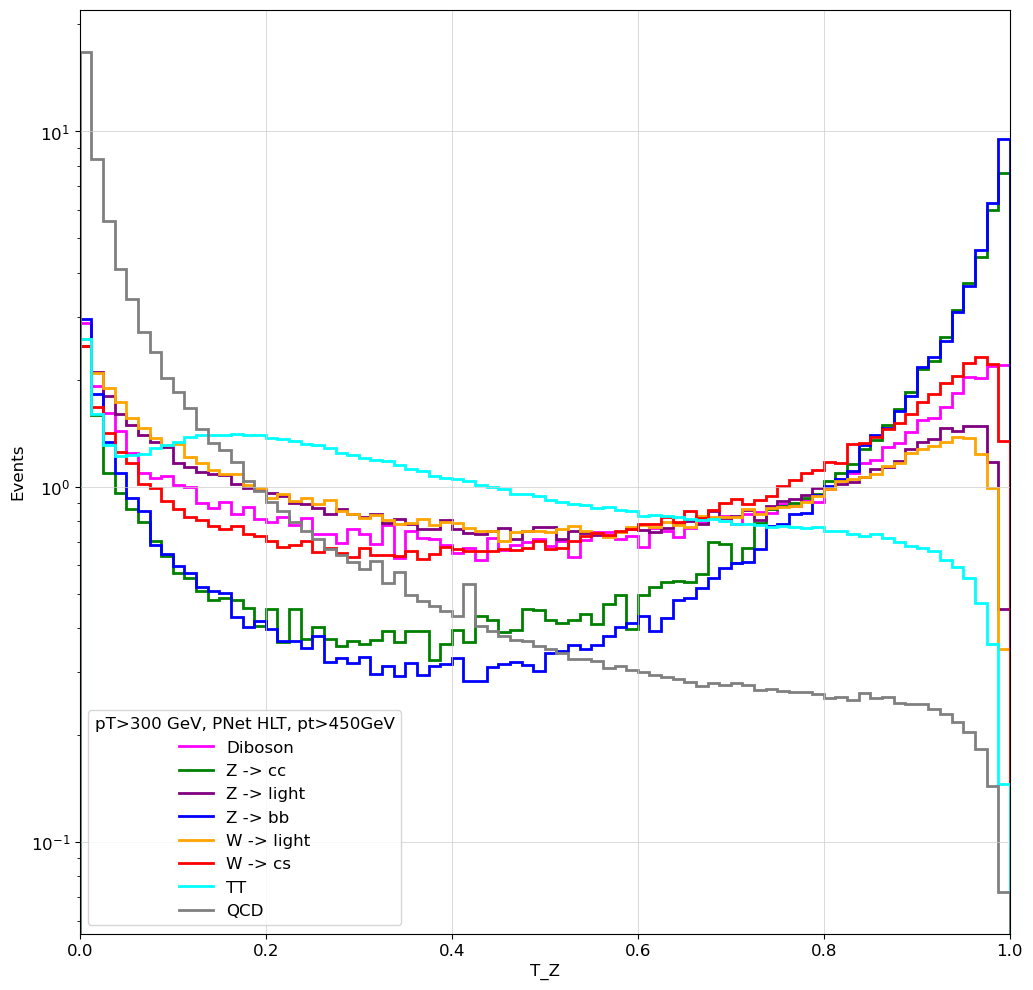

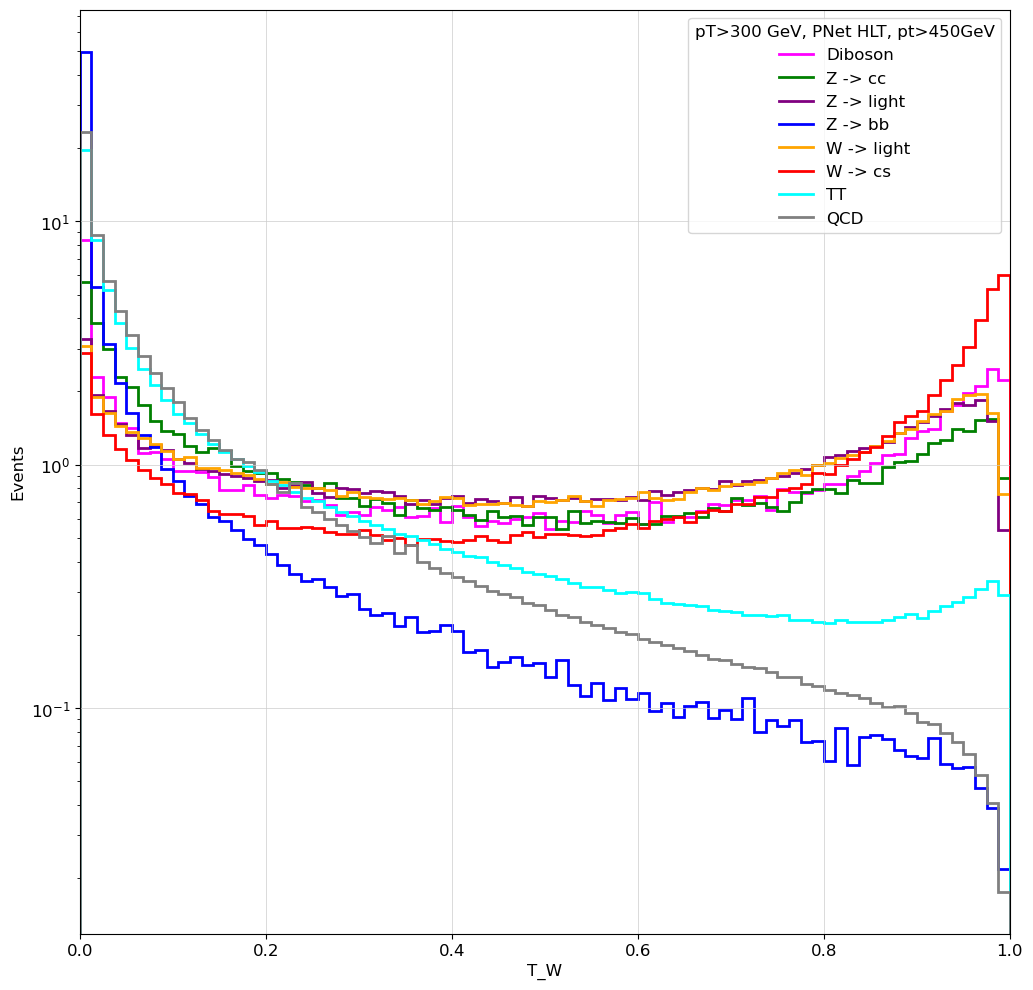

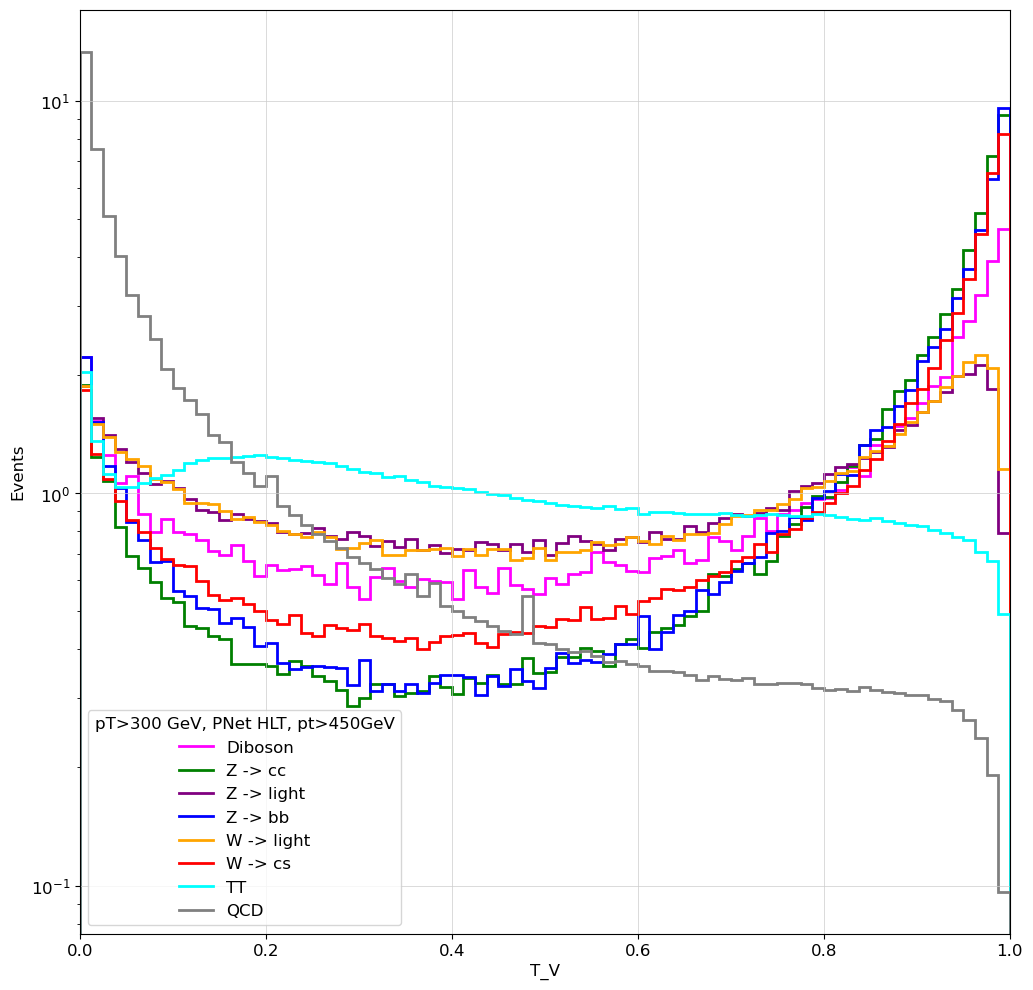

In [19]:
plot_discriminator("TZ", "PNet HLT, pt>450GeV")
plot_discriminator("TW", "PNet HLT, pt>450GeV")
plot_discriminator("TV", "PNet HLT, pt>450GeV")